# IRIS FLOWER IDENTIFICATION: K-CLUSTERING AND ELBOW POINT

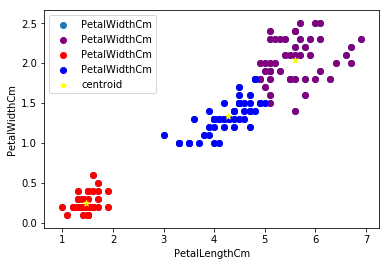

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
#data = datasets.load_iris()
data=pd.read_csv('Iris.csv')
data.head()
plt.scatter(data.PetalLengthCm,data['PetalWidthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(data[['PetalLengthCm','PetalWidthCm']])
y_pred
data['cluster']=y_pred
data.head()
km.cluster_centers_
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.PetalLengthCm,df1['PetalWidthCm'],color='purple')
plt.scatter(df2.PetalLengthCm,df2['PetalWidthCm'],color='red')
plt.scatter(df3.PetalLengthCm,df3['PetalWidthCm'],color='blUE')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
#ELBOW POINT

#km.predict([[0.63,0.1]])

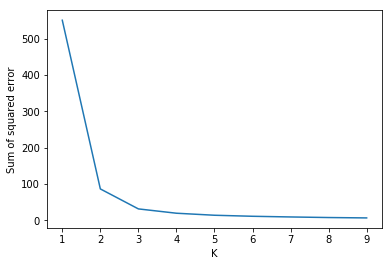

In [53]:
#ELBOW POINT
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)
    
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Iris flower with RANDOM FOREST

In [44]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
np.random.seed(0)
#randomSeed(0) se humesha same nos hi aayenge
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)

y=pd.factorize(df['species'])[0]
df1=df
yt=df['species']
df.drop('species',axis='columns',inplace=True)

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.25)
#Creating random forest classifier

clf=RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)*100
preds=iris.target_names[clf.predict([[5.0,3.6,1.4,2.0],[5.0,3.6,1.4,2.0]])]
preds
#pd.crosstab(yt,preds,rownames=['Actual Species'],colnames=['Predicted Species'])

C:\Users\ASHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['versicolor', 'versicolor'], dtype='<U10')